# Batch Normalization
Example how batch normalization module is working  
https://pytorch.org/docs/stable/nn.html#torch.nn.BatchNorm1d

- Shifts and scales features in a mini batch 
- More invariant to weights initialization
- More stable gradients
- Faster convergence (fewer iterations needed because of covariate shift reduction), but more computation needed (more time needed per iteration)
- Has some regularization effect (noise in the training because different statistics per batch)

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt

In [30]:
import torch
import torch.nn as nn

In [32]:
dim=4
batch_size = 16
batchnorm = nn.BatchNorm1d(dim, affine=True)

In [33]:
# Let's see how scaling and shift values are initialized
batchnorm.weight, batchnorm.bias

(Parameter containing:
 tensor([0.6651, 0.5392, 0.9903, 0.2975], requires_grad=True),
 Parameter containing:
 tensor([0., 0., 0., 0.], requires_grad=True))

In [34]:
data = 10.0 + 2*torch.randn(batch_size, dim)

In [35]:
# data.mean(1, keepdim=True)
print(data)

tensor([[ 8.8376,  8.3541, 12.7303,  9.7380],
        [ 9.2700, 12.8811, 13.9059, 12.3523],
        [ 9.7586, 11.9837, 12.7261,  8.3892],
        [10.4763,  9.5522,  8.9885, 10.6336],
        [11.3012,  9.4174,  9.7463,  9.8143],
        [ 9.8647,  8.4507,  9.9169, 11.5026],
        [ 9.6938, 11.2616,  7.9024, 10.4886],
        [ 6.7736, 11.1594, 10.3675,  8.4980],
        [10.4625,  9.7631,  8.1485,  8.2927],
        [11.7651, 10.9357, 10.6620, 11.1853],
        [11.2514, 12.1874,  9.0607,  8.4344],
        [ 9.7623,  9.6103, 11.6487, 10.5985],
        [11.0323,  9.9644, 13.1092,  8.1972],
        [11.1769, 12.7278, 13.6166, 12.1750],
        [ 7.2628,  7.8793,  7.4940, 11.9389],
        [10.6585,  8.9242,  9.3574,  9.9326]])


In [36]:
normalized_batch = batchnorm(data)

In [37]:
normalized_batch

tensor([[-0.5477, -0.6846,  1.0362, -0.0837],
        [-0.3365,  0.8953,  1.6043,  0.4666],
        [-0.0980,  0.5821,  1.0341, -0.3676],
        [ 0.2524, -0.2665, -0.7722,  0.1048],
        [ 0.6552, -0.3135, -0.4060, -0.0677],
        [-0.0462, -0.6509, -0.3235,  0.2877],
        [-0.1296,  0.3301, -1.2971,  0.0743],
        [-1.5554,  0.2944, -0.1058, -0.3448],
        [ 0.2457, -0.1929, -1.1781, -0.3880],
        [ 0.8817,  0.2163,  0.0366,  0.2210],
        [ 0.6309,  0.6532, -0.7373, -0.3581],
        [-0.0962, -0.2462,  0.5134,  0.0974],
        [ 0.5239, -0.1226,  1.2193, -0.4081],
        [ 0.5946,  0.8418,  1.4645,  0.4293],
        [-1.3166, -0.8503, -1.4944,  0.3796],
        [ 0.3414, -0.4856, -0.5939, -0.0427]],
       grad_fn=<NativeBatchNormBackward>)

In [38]:
normalized_batch.mean(dim=0)

tensor([8.9407e-08, 1.8626e-08, 0.0000e+00, 6.6357e-08],
       grad_fn=<MeanBackward0>)

In [39]:
normalized_batch.std(dim=0)

tensor([0.6869, 0.5569, 1.0227, 0.3073], grad_fn=<StdBackward1>)

In [40]:
batchnorm.weight, batchnorm.bias

(Parameter containing:
 tensor([0.6651, 0.5392, 0.9903, 0.2975], requires_grad=True),
 Parameter containing:
 tensor([0., 0., 0., 0.], requires_grad=True))

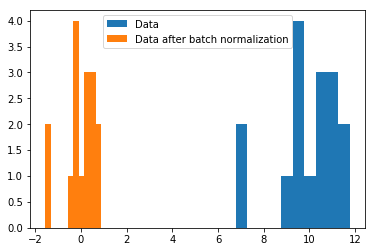

In [41]:
plt.hist(data[:,0])
plt.hist(normalized_batch.detach().cpu().numpy()[:,0])
plt.legend(['Data', 'Data after batch normalization'])

# train() vs eval()
In **train** mode, each feature is normalized by batch's mean and variance.  
In **eval** mode, each feature is normalized by global running mean and variance computed during training

In [42]:
# At the beggining of training, running mean and std are not estimated
batchnorm.running_mean, batchnorm.running_var # <- not close to real mean (10) and var

(tensor([0.9959, 1.0316, 1.0586, 1.0136]),
 tensor([1.0979, 1.1546, 1.3479, 1.1131]))

In [43]:
batchnorm.eval()
batchnorm(data) # input tensor is returned

tensor([[ 4.9774,  3.6743,  9.9555,  2.4604],
        [ 5.2518,  5.9458, 10.9582,  3.1977],
        [ 5.5620,  5.4955,  9.9519,  2.0801],
        [ 6.0175,  4.2754,  6.7638,  2.7130],
        [ 6.5411,  4.2078,  7.4102,  2.4820],
        [ 5.6293,  3.7227,  7.5557,  2.9581],
        [ 5.5208,  5.1332,  5.8374,  2.6721],
        [ 3.6673,  5.0819,  7.9400,  2.1107],
        [ 6.0087,  4.3813,  6.0474,  2.0528],
        [ 6.8355,  4.9697,  8.1913,  2.8686],
        [ 6.5095,  5.5977,  6.8254,  2.0928],
        [ 5.5643,  4.3046,  9.0329,  2.7031],
        [ 6.3704,  4.4823, 10.2787,  2.0259],
        [ 6.4622,  5.8689, 10.7115,  3.1477],
        [ 3.9778,  3.4361,  5.4891,  3.0812],
        [ 6.1332,  3.9603,  7.0785,  2.5153]],
       grad_fn=<NativeBatchNormBackward>)

In [44]:
batchnorm.train()
batchnorm(data)

tensor([[-0.5477, -0.6846,  1.0362, -0.0837],
        [-0.3365,  0.8953,  1.6043,  0.4666],
        [-0.0980,  0.5821,  1.0341, -0.3676],
        [ 0.2524, -0.2665, -0.7722,  0.1048],
        [ 0.6552, -0.3135, -0.4060, -0.0677],
        [-0.0462, -0.6509, -0.3235,  0.2877],
        [-0.1296,  0.3301, -1.2971,  0.0743],
        [-1.5554,  0.2944, -0.1058, -0.3448],
        [ 0.2457, -0.1929, -1.1781, -0.3880],
        [ 0.8817,  0.2163,  0.0366,  0.2210],
        [ 0.6309,  0.6532, -0.7373, -0.3581],
        [-0.0962, -0.2462,  0.5134,  0.0974],
        [ 0.5239, -0.1226,  1.2193, -0.4081],
        [ 0.5946,  0.8418,  1.4645,  0.4293],
        [-1.3166, -0.8503, -1.4944,  0.3796],
        [ 0.3414, -0.4856, -0.5939, -0.0427]],
       grad_fn=<NativeBatchNormBackward>)

In [45]:
for i in range(100):
    batchnorm(data)

In [46]:
# Now mean and variance are better estimated
batchnorm.running_mean, batchnorm.running_var # <- not close to real mean (10) and var

(tensor([ 9.9590, 10.3155, 10.5861, 10.1355]),
 tensor([1.9790, 2.5460, 4.4785, 2.1309]))

In [47]:
# Now mean and variance are estimated
batchnorm.eval()
batchnorm(data) # input tensor is returned

tensor([[-0.5302, -0.6628,  1.0034, -0.0810],
        [-0.3257,  0.8669,  1.5534,  0.4518],
        [-0.0947,  0.5637,  1.0014, -0.3559],
        [ 0.2445, -0.2580, -0.7476,  0.1015],
        [ 0.6345, -0.3035, -0.3930, -0.0655],
        [-0.0446, -0.6302, -0.3132,  0.2786],
        [-0.1254,  0.3197, -1.2558,  0.0720],
        [-1.5059,  0.2851, -0.1023, -0.3338],
        [ 0.2380, -0.1867, -1.1406, -0.3756],
        [ 0.8538,  0.2095,  0.0355,  0.2140],
        [ 0.6110,  0.6325, -0.7138, -0.3467],
        [-0.0930, -0.2383,  0.4972,  0.0944],
        [ 0.5074, -0.1187,  1.1807, -0.3951],
        [ 0.5758,  0.8151,  1.4181,  0.4157],
        [-1.2747, -0.8232, -1.4469,  0.3676],
        [ 0.3307, -0.4701, -0.5749, -0.0413]],
       grad_fn=<NativeBatchNormBackward>)

In [48]:
batchnorm(data).mean(dim=0)

tensor([1.0153e-04, 7.4785e-05, 1.0665e-04, 4.4574e-05],
       grad_fn=<MeanBackward0>)

# Effect on training

In [20]:
import torch.nn as nn
    
class MLPModel(nn.Module):
    
    def __init__(self, input_dim, hidden_dim):
        super(MLPModel, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, 2)
        )
    
    def forward(self, input):
        input = input.view(input.size(0), -1)
        return self.layers(input)

In [21]:
import torch.nn as nn

class MLPBatchNormModel(nn.Module):
    
    def __init__(self, input_dim, hidden_dim):
        super(MLPBatchNormModel, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            # add it between transformation layer and activation function
            nn.BatchNorm1d(hidden_dim),
            #
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
            # add it between transformation layer and activation function
            nn.BatchNorm1d(hidden_dim),
            #
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
            # add it between transformation layer and activation function
            nn.BatchNorm1d(hidden_dim),
            #
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
            # add it between transformation layer and activation function
            nn.BatchNorm1d(hidden_dim),
            #
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
            # add it between transformation layer and activation function
            nn.BatchNorm1d(hidden_dim),
            #
            nn.ReLU(),
            nn.Linear(hidden_dim, 2)
        )
    
    def forward(self, input):
        input = input.view(input.size(0), -1)
        return self.layers(input)

In [22]:
# Let's run some random data through the randomly initialized models
model_standard = MLPModel(32*32*3, 128)
model_batchnorm = MLPBatchNormModel(32*32*3, 128)

In [24]:
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
from torchvision.datasets import ImageFolder
from torchvision.transforms import Resize, ToTensor, Normalize, Compose

target_size = (32, 32)
batch_size = 32

transforms = Compose([Resize(target_size), # Resizes image
                    ToTensor(),           # Converts to Tensor, scales to [0, 1] float (from [0, 255] int)
                    Normalize(mean=(0.5, 0.5, 0.5,), std=(0.5, 0.5, 0.5)), # scales to [-1.0, 1.0]
                    ])

# Load train data
root_dir = '../dogscats/train'
train_dataset = ImageFolder(root_dir, transform=transforms)
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=32)

# Load validation data
val_root_dir = '../dogscats/valid'
val_dataset = ImageFolder(val_root_dir, transform=transforms)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=4)

In [25]:
from utils_train import fit # defined in utils_train.py

In [26]:
model = MLPModel(32*32*3, 128)
model = model.to(device)
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
n_epochs = 25
loss_fn = nn.CrossEntropyLoss()

curves = fit(train_dataloader, val_dataloader, model, optimizer, loss_fn, n_epochs)

Epoch 1/25: train_loss: 0.6929, train_accuracy: 51.9696, val_loss: 0.6926, val_accuracy: 55.4000
Epoch 2/25: train_loss: 0.6923, train_accuracy: 53.9130, val_loss: 0.6917, val_accuracy: 56.5000
Epoch 3/25: train_loss: 0.6908, train_accuracy: 56.1826, val_loss: 0.6895, val_accuracy: 56.7500
Epoch 4/25: train_loss: 0.6866, train_accuracy: 58.4478, val_loss: 0.6829, val_accuracy: 58.8500
Epoch 5/25: train_loss: 0.6742, train_accuracy: 60.5217, val_loss: 0.6653, val_accuracy: 60.9500
Epoch 6/25: train_loss: 0.6517, train_accuracy: 62.6130, val_loss: 0.6484, val_accuracy: 62.7000
Epoch 7/25: train_loss: 0.6329, train_accuracy: 64.4652, val_loss: 0.6357, val_accuracy: 63.3500
Epoch 8/25: train_loss: 0.6181, train_accuracy: 65.9217, val_loss: 0.6305, val_accuracy: 63.7000
Epoch 9/25: train_loss: 0.6048, train_accuracy: 67.1913, val_loss: 0.6256, val_accuracy: 65.3000
Epoch 10/25: train_loss: 0.5908, train_accuracy: 68.5739, val_loss: 0.6176, val_accuracy: 66.0000
Epoch 11/25: train_loss: 0.57

In [27]:
model = MLPBatchNormModel(32*32*3, 128)
model = model.to(device)
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
n_epochs = 25
loss_fn = nn.CrossEntropyLoss()

curves_batchnorm = fit(train_dataloader, val_dataloader, model, optimizer, loss_fn, n_epochs)

Epoch 1/25: train_loss: 0.6552, train_accuracy: 60.8478, val_loss: 0.6395, val_accuracy: 63.0000
Epoch 2/25: train_loss: 0.6226, train_accuracy: 64.5913, val_loss: 0.6250, val_accuracy: 64.2500
Epoch 3/25: train_loss: 0.6036, train_accuracy: 66.8043, val_loss: 0.6249, val_accuracy: 64.2000
Epoch 4/25: train_loss: 0.5897, train_accuracy: 67.8087, val_loss: 0.6251, val_accuracy: 64.9500
Epoch 5/25: train_loss: 0.5759, train_accuracy: 69.4696, val_loss: 0.6111, val_accuracy: 66.4500
Epoch 6/25: train_loss: 0.5580, train_accuracy: 70.9130, val_loss: 0.6126, val_accuracy: 65.7000
Epoch 7/25: train_loss: 0.5478, train_accuracy: 71.9565, val_loss: 0.6138, val_accuracy: 67.0500
Epoch 8/25: train_loss: 0.5367, train_accuracy: 72.5696, val_loss: 0.6195, val_accuracy: 64.9500
Epoch 9/25: train_loss: 0.5211, train_accuracy: 73.9174, val_loss: 0.6236, val_accuracy: 66.3000
Epoch 10/25: train_loss: 0.5112, train_accuracy: 74.6000, val_loss: 0.6215, val_accuracy: 66.5500
Epoch 11/25: train_loss: 0.49

Text(0, 0.5, 'loss')

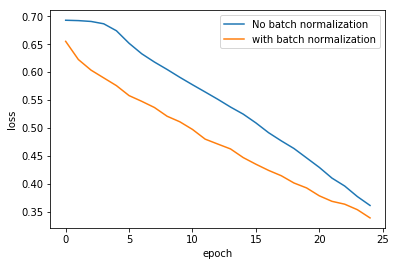

In [28]:
plt.plot(curves[0])
plt.plot(curves_batchnorm[0])
plt.legend(['No batch normalization', 'with batch normalization'])
plt.xlabel('epoch')
plt.ylabel('loss')